<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import imageio
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Import dataset

In [ ]:
mat = loadmat("ex7data1.mat")
X = mat["X"]

Visualize data

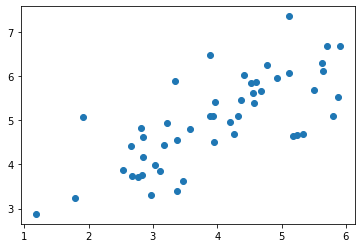

In [ ]:
plt.scatter(X[:,0], X[:,1])

Standarize

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_reduce = scaler.transform(X)
X_reduce

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417],
       [-0.08490201,  1.46633377],
       [-0.44215763, -1.35221333],
       [ 1.65512709,  1.65622961],
       [-0.05198776,  0.09440201],
       [ 0.49305926,  0.61245677],
       [ 0.50359639,  0.38973079],
       [ 0.32935623,  0.45242294],
       [ 0.17431804, -0.04748911],
       [ 1.08056741, -0.33689741],
       [-0.99325294, -1.21879564],
       [ 1.41742949,  1.2923503 ],
       [ 0.60026548,  0.65385535],
       [-0.98061738, -0.37147508],
       [ 0.96523763,  2.32981886],
       [ 1.02758927, -0.35168199],
       [ 1.47948139,  1.65649752],
       [-0.35270365, -0.19743438],
       [ 1.42096706,  1.10315449],
       [ 0.23612558, -0.30931801],
       [-1.25101023, -1.1038306 ],
       [-0.65914279, -0.05946964],
       [ 0.80965726,  0.93988073],
       [ 1.55321995,  0.10421963],
       [-1.00960756,

Apply PCA

In [ ]:
pca = PCA(n_components=1)
pca.fit(X_reduce)
X_transformed = pca.transform(X_reduce)
print(pca.components_ ,"explains : " , pca.explained_variance_ratio_ ," variance")

[[-0.70710678 -0.70710678]] explains :  [0.86776519]  variance


Approximating

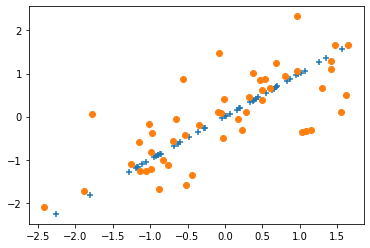

In [ ]:
X_approx = pca.inverse_transform(X_transformed)
X_approx
plt.scatter(X_approx[:,0], X_approx[:,1], marker='+')
plt.scatter(X_reduce[:,0], X_reduce[:,1])

Faces

(5000, 1024)

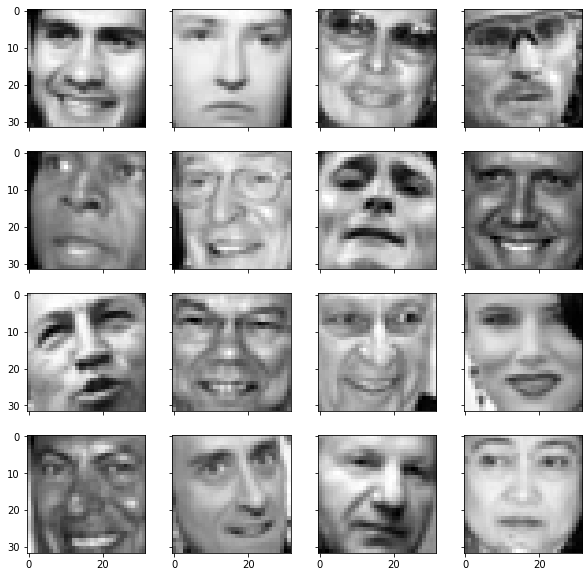

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(10,10)) 
faces = loadmat("ex7faces.mat")["X"]
axs = axs.flatten()
for i in range(16):
    axs[i].imshow(faces[np.random.randint(0, 5000)].reshape(32,-1).T, cmap='gray')
faces.shape

Applying PCA

In [ ]:
scaler_faces = StandardScaler()
scaler_faces.fit(faces)
X_reduce = scaler_faces.transform(faces)
pca_faces = PCA(n_components=100)
faces_reduce = pca_faces.fit_transform(faces)
faces_reduce.shape
eigenfaces = pca_faces.components_
eigenfaces.shape

(100, 1024)

Visualize

(5000, 1024)

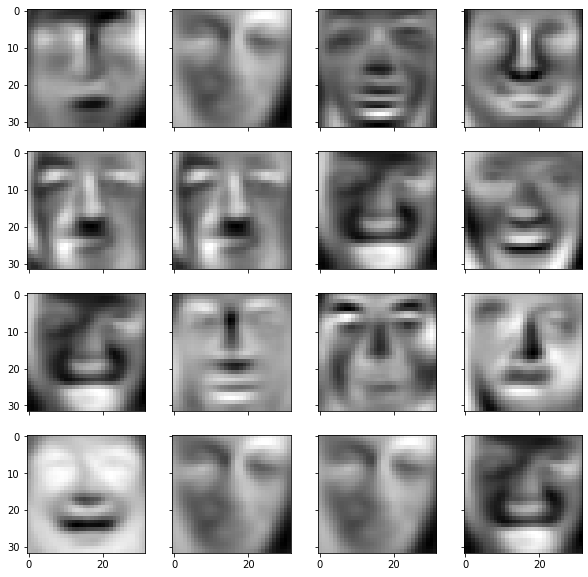

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(10,10)) 
axs = axs.flatten()
for i in range(16):
    axs[i].imshow(eigenfaces[np.random.randint(0, 32)].reshape(32,-1).T, cmap='gray')
faces.shape